# ロジスティック回帰による二項分類器

トレーニングセットのデータをpandasのデータフレームとして格納する。  
pandosのデータフレームとはスプレッドシート形式の２次元データセットのことである。

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series #DataFrameが二次元でSeriesが一次元

In [19]:
np.random.seed(42)

n0, mu0, variance0 = 20, [10, 11], 10
data0 = multivariate_normal(mu0, np.eye(2)*variance0 , n0) #平均mu(10, 11)T ,分散共分散行列[[10,0],[0,10]], 個数　#np.eye()は2次元の単位行列を生成している
df0 = DataFrame(data0, columns=['x1','x2']) #data0にx1,x2というindexの名前をつけるイメージ
df0['t'] = 0 # t=0　つまり非感染のラベル

n1, mu1, variance1 = 15, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1, n1) #平均mu(18, 20)T ,分散共分散行列[[22,0],[0,22]] , 個数 #np.eye()は2次元の単位行列を生成している
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1['t'] = 1 # t=1　つまり感染のラベル

df = pd.concat([df0, df1], ignore_index=True)#データの中身をある方向にそのままつなげるpd.concat　列方向に連結
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)#より本物のデータらしくするために行の順番を入れ替えている

In [20]:
train_set

,x1,x2,t
0,4.545331,9.221891,0
1,15.839413,24.958343,1
2,19.696223,16.974120,1
3,22.835816,24.368091,1
4,12.601115,7.139353,0
5,19.553763,24.575712,1
6,12.048171,15.816243,0
7,10.213543,6.494551,0
8,8.534545,9.527233,0
9,9.259542,10.259594,0


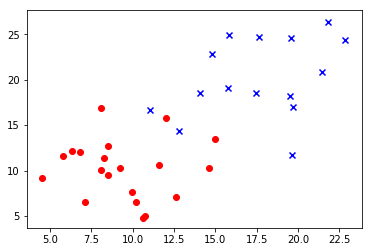

In [21]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.scatter(df0['x1'], df0['x2'], color='r',marker='o')
subplot.scatter(df1['x1'], df1['x2'], color='b',marker='x')
plt.show()

In [22]:
train_x = train_set[['x1','x2']].values #.as_matrix()　は非推奨で .valuesに置き換える
train_t = train_set['t'].values.reshape([len(train_set), 1])

In [23]:
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x, w) + w0
p = tf.sigmoid(f)

In [24]:
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [25]:
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))#y = sign(x) = -1 if x < 0;     0 if x == 0;      1 if x > 0. False,Trueを返す
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #tf.cast( 変換したいもの , 変換後の型 ) castでFalseを0,Trueを1に変換するので正答率と一致する

In [26]:
sess = tf.Session()
sess.run(tf.initialize_all_variables()) #tf.initialize_all_variables()をglobalの方に置き換える

In [27]:
i = 0
for _  in range(20000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 2000 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:train_x, t:train_t})
        print('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 2000, Loss: 15.709656, Accuracy: 0.914286
Step: 4000, Loss: 11.240766, Accuracy: 0.914286
Step: 6000, Loss: 8.553828, Accuracy: 0.914286
Step: 8000, Loss: 6.868614, Accuracy: 0.885714
Step: 10000, Loss: 5.782053, Accuracy: 0.914286
Step: 12000, Loss: 5.066100, Accuracy: 0.914286
Step: 14000, Loss: 4.584938, Accuracy: 0.914286
Step: 16000, Loss: 4.255560, Accuracy: 0.885714
Step: 18000, Loss: 4.026278, Accuracy: 0.914286
Step: 20000, Loss: 3.864371, Accuracy: 0.914286


In [28]:
w0_val, w_val = sess.run([w0, w])
w0_val, w1_val, w2_val = w0_val[0], w_val[0][0], w_val[1][0]
print(w0_val, w1_val, w2_val)

-15.797095 0.5150971 0.60947156


# 結果をグラフに表示する　

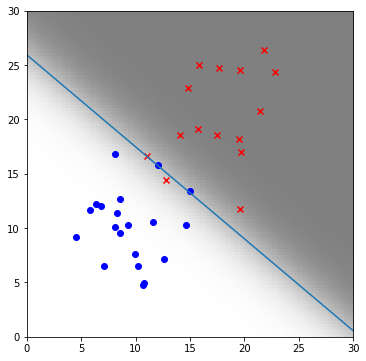

In [29]:
train_set0 = train_set[train_set['t'] == 0]
train_set1 = train_set[train_set['t'] == 1]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, color='r', marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, color='b', marker='o')

linex = np.linspace(0,30,10)
liney = - (w1_val*linex/w2_val + w0_val/w2_val) #w2*y + w1*x + w0 = 0を　w2= -w1*x/w2 - w0/w2の形でプロット
subplot.plot(linex, liney)

field = [[(1/(1+np.exp(-(w0_val + w1_val*x1 + w2_val*x2)))) for x1 in np.linspace(0, 30, 100)] for x2 in np.linspace(0, 30, 100)]
subplot.imshow(field, origin = 'lower', extent = (0, 30, 0, 30), cmap = plt.cm.gray_r, alpha=0.5)
plt.show()

In [111]:
sess.close()

# テストセットを用いた検証

In [112]:
np.random.seed(42)

n0, mu0, variance0 = 800, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0 , n0) 
df0 = DataFrame(data0, columns=['x1','x2']) 
df0['t'] = 0 # t=0　つまり非感染のラベル

n1, mu1, variance1 = 600, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1, n1) 
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1['t'] = 1 # t=1　つまり感染のラベル

df = pd.concat([df0, df1], ignore_index=True)#データの中身をある方向にそのままつなげるpd.concat　列方向に連結
df = df.reindex(permutation(df.index)).reset_index(drop=True)#より本物のデータらしくするために行の順番を入れ替えている

num_data = int(len(df)*0.8)
train_set = df[:num_data] #80%が訓練データ
test_set = df[num_data:] #20%がテストデータ

In [113]:
train_x = train_set[['x1','x2']].values
train_t = train_set['t'].values.reshape([len(train_set), 1])
test_x = test_set[['x1','x2']].values
test_t = test_set['t'].values.reshape([len(test_set), 1])

### 共通部分

In [114]:
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x, w) + w0
p = tf.sigmoid(f)

t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer()) #tf.initialize_all_variables()は置き換える

In [115]:
train_accuracy = []
test_accuracy = []

for _  in range(2500):
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    acc_val = sess.run(accuracy, feed_dict = {x:train_x, t:train_t})
    train_accuracy.append(acc_val)
    acc_val = sess.run(accuracy, feed_dict = {x:test_x, t:test_t})
    test_accuracy.append(acc_val)

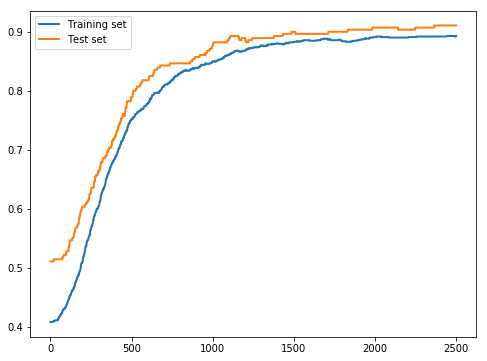

In [116]:
fig = plt.figure(figsize=(8, 6))
subplot = fig.add_subplot(1,1,1)
subplot.plot(range(len(train_accuracy)), train_accuracy, linewidth = 2, label = 'Training set')
subplot.plot(range(len(test_accuracy)), test_accuracy, linewidth = 2, label = 'Test set')
subplot.legend(loc = 'upper left')
plt.show()